# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [7]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

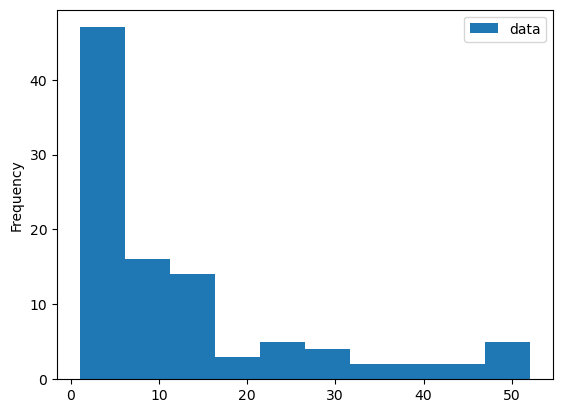

In [8]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

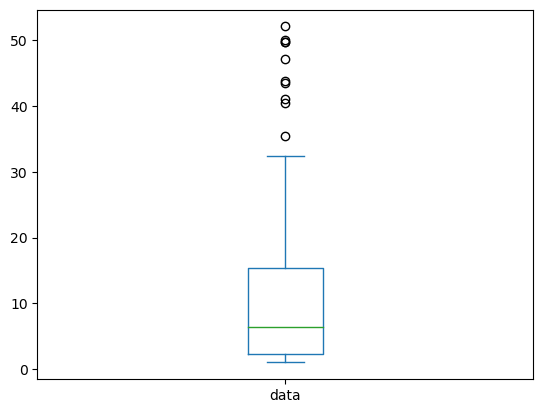

In [3]:
df.plot.box()

<b>Ans: Please write a short explanation of the pros and cons of these two representations.</b> <br>

<b>Histogram Plot </b> <br>
<u>   Pros: </u>
<br>&emsp; 1. It show the occurance of the the data with respect to price of the Drugs.
<br>&emsp; 2. It is easier to understand the distribution of the sales with price bucket.
<br>&emsp; 3. It help to get an idea of outliers, skewness and patterns of the data.
<br>&emsp; 4. It is useful for initial data exploration.
<br><u>   Pros: </u>
<br>&emsp; 1. The appearance of the histogram is really not clear as the bins does not have any clear distinction arround with the data.
<br>&emsp; 2. There is a loss of understanding the data as there is not enough marker of the data.
<br>&emsp; 3. It is oversimplified representation of the datapoints.

<br>
<b>Box Plot </b> <br>
<u>   Pros: </u>
<br>&emsp; 1. This box plot is summerizing the data points of this sales data distributions.
<br>&emsp; 2. It is showing that there are many outlier data that resides outside the "whiskers." .
<br>&emsp; 3. It gives the idea about the skewness of the data, also the median and spread of the data.
<br>&emsp; 4. It is useful for initial data exploration.
<br><u>   Pros: </u>
<br>&emsp; 1. There is a loss of understanding the data as there is not enough marker of the data.
<br>&emsp; 2. It is oversimplified representation of the datapoints and there is loss of data points due to this oversimplification of the data.
<br>&emsp; 3. Though it is showing the spread and central tendency of the data but provide the shape of the distribution or the skewness of the data.
<br>&emsp; 4. There markers is not present to show median or quantile values of the plot.


<b>Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?</b>
<br> Both of the plot have their own pros and cons but we can use them together so that it can complement each other or we can modify the ploting with more informations like legend, data tip, quantile informations, line and ticker. Please find the below plot created as a simple referance to make the above plots better to understand.

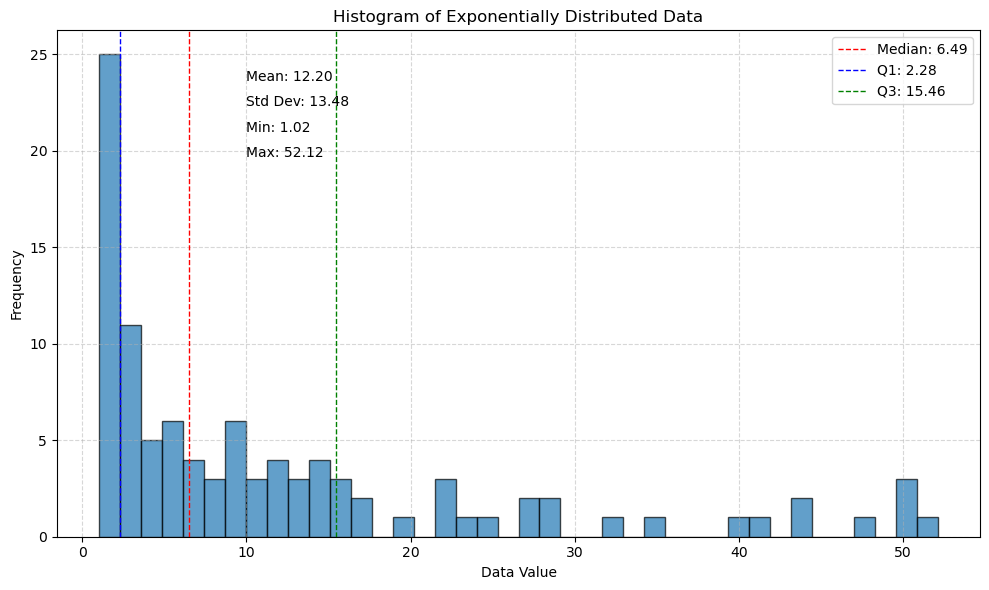

0.25     2.278318
0.50     6.487874
0.75    15.457656
Name: data, dtype: float64
Mean: 12.203455539414831
Standard Deviation: 13.48290985141327
Minimum Value: 1.018959394198728
Maximum Value: 52.117216865281556


In [17]:
import matplotlib.pyplot as plt

## I have used Google Gemini to generate subset of the code
# Calculate quantiles and median
quantiles = df["data"].quantile([0.25, 0.5, 0.75])  # Calculate Q1, Median (Q2), Q3
median = quantiles[0.5]
q1 = quantiles[0.25]
q3 = quantiles[0.75]

# Calculate other useful statistics
mean = df["data"].mean()
std = df["data"].std()
min_val = df["data"].min()
max_val = df["data"].max()

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
n, bins, patches = plt.hist(df["data"], bins=40, edgecolor='black', alpha=0.7) # Adjust bins as needed

# Add vertical lines for quantiles and median
plt.axvline(median, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.axvline(q1, color='blue', linestyle='dashed', linewidth=1, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='green', linestyle='dashed', linewidth=1, label=f'Q3: {q3:.2f}')


# Add annotations for mean and standard deviation
plt.text(0.205, 0.9, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
plt.text(0.205, 0.85, f'Std Dev: {std:.2f}', transform=plt.gca().transAxes)
plt.text(0.205, 0.8, f'Min: {min_val:.2f}', transform=plt.gca().transAxes)
plt.text(0.205, 0.75, f'Max: {max_val:.2f}', transform=plt.gca().transAxes)


# Customize the plot
plt.title('Histogram of Exponentially Distributed Data')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.legend()  # Show the legend for quantiles and median
plt.grid(True, linestyle='--', alpha=0.5)  # Add a subtle grid
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Print quantiles and other stats to the console for easy access
print(quantiles)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Minimum Value: {min_val}")
print(f"Maximum Value: {max_val}")

None

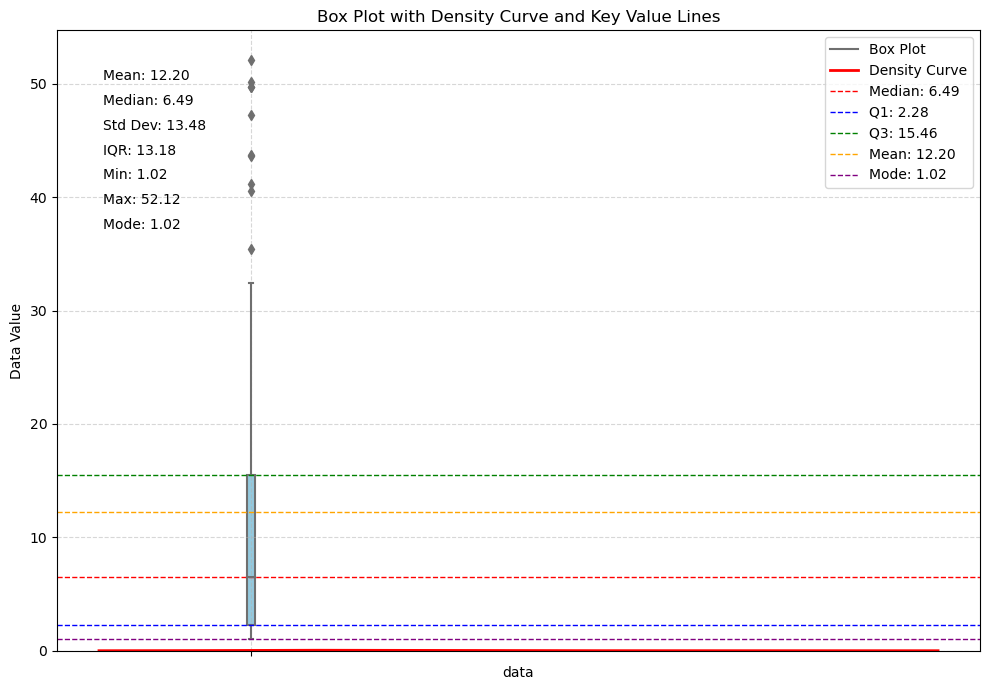

0.25     2.278318
0.50     6.487874
0.75    15.457656
Name: data, dtype: float64
Mean: 12.203455539414831
Median: 6.487874052070969
Standard Deviation: 13.48290985141327
IQR: 13.17933788996785
Minimum Value: 1.018959394198728
Maximum Value: 52.117216865281556
Mode: 1.018959394198728


In [33]:
# I have used Google Gemini to generate subset of the Code

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

df = pd.DataFrame(data, columns=["data"])

# Calculate statistics
quantiles = df["data"].quantile([0.25, 0.5, 0.75])
median = quantiles[0.5]
q1 = quantiles[0.25]
q3 = quantiles[0.75]
mean = df["data"].mean()
std = df["data"].std()
min_val = df["data"].min()
max_val = df["data"].max()
iqr = q3 - q1

mode_result = mode(df["data"])
mode_val = mode_result


plt.figure(figsize=(10, 7))

# Box plot
box_plot = sns.boxplot(y=df["data"], color="skyblue", linewidth=1.5)
median_line = box_plot.lines[2]
median_line.set_label("Box Plot")

# Overlay the density curve
sns.kdeplot(df["data"], color='red', linewidth=2, label="Density Curve")

# Add horizontal lines for key values
plt.axhline(median, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.axhline(q1, color='blue', linestyle='dashed', linewidth=1, label=f'Q1: {q1:.2f}')
plt.axhline(q3, color='green', linestyle='dashed', linewidth=1, label=f'Q3: {q3:.2f}')
plt.axhline(mean, color='orange', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')


# Annotations for statistics (Improved Placement)
text_x_pos = 0.05
text_y_start = 0.92
text_y_step = 0.04

plt.text(text_x_pos, text_y_start, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
plt.text(text_x_pos, text_y_start - text_y_step, f'Median: {median:.2f}', transform=plt.gca().transAxes)
plt.text(text_x_pos, text_y_start - 2 * text_y_step, f'Std Dev: {std:.2f}', transform=plt.gca().transAxes)
plt.text(text_x_pos, text_y_start - 3 * text_y_step, f'IQR: {iqr:.2f}', transform=plt.gca().transAxes)
plt.text(text_x_pos, text_y_start - 4 * text_y_step, f'Min: {min_val:.2f}', transform=plt.gca().transAxes)
plt.text(text_x_pos, text_y_start - 5 * text_y_step, f'Max: {max_val:.2f}', transform=plt.gca().transAxes)

# Handle mode(s) for annotation
mode_result = mode(df["data"])
mode_val = mode_result.mode
if mode_val.size > 1:  # Multiple modes
    mode_str = ", ".join([f"{m:.2f}" for m in mode_val[0]])
    plt.axhline(mode_val[0][0], color='purple', linestyle='dashed', linewidth=1, label=f'Modes: {mode_str}')
    plt.text(text_x_pos, text_y_start - 6 * text_y_step, f'Modes: {mode_str}', transform=plt.gca().transAxes)

else:  # Single mode
    mode_val = mode_val
    plt.axhline(mode_val, color='purple', linestyle='dashed', linewidth=1, label=f'Mode: {mode_val:.2f}')
    plt.text(text_x_pos, text_y_start - 6 * text_y_step, f'Mode: {mode_val:.2f}', transform=plt.gca().transAxes)


# Title and labels
plt.title('Box Plot with Density Curve and Key Value Lines')
plt.ylabel('Data Value')

# Legend
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.5)

# Improved layout
plt.tight_layout()
plt.show()

# Print statistics to console
print(quantiles)
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")
print(f"IQR: {iqr}")
print(f"Minimum Value: {min_val}")
print(f"Maximum Value: {max_val}")

# Print Mode(s) Correctly
mode_result = mode(df["data"])
mode_val = mode_result.mode
if mode_val.size > 1:
    mode_str = ", ".join([f"{m:.2f}" for m in mode_val[0]])
    print(f"Modes: {mode_str}")
else:
    print(f"Mode: {mode_val}")

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

<b>Details about the dataset</b><br>
The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours.
<br>
Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label.
<br>
These features are described in UNSW-NB15_features.csv file.
<br>
The total number of records is two million and 540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.
<br>

<b>These Details are from Kaggle, citation bellow.</b>
<Br>
mrwellsdavid. (2023). UNSW-NB15 [Dataset]. Kaggle. <br>https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.